In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

import os
from os.path import join as pjoin


from esn_lib.esn import *
from esn_lib.hubesn import *

# Compare ESN heterogeneity, Newman modularity, and number of unconnected neurons

In [2]:
exp_coefficient = 2
EXPTPATH = f'../results/exp_coefficient/exp_coefficient_{exp_coefficient}'
PLTPATH = '../plots/topology'

In [4]:
def get_hubesn_cv(params, dc_list, p2):
    """
    @param dc_list: list of distant constraints
    Compare the heterogeneity of HubESN with different constraints
    Compare the number of wandering nodes of HubESN with different constraints
    """
    # generate distant constraints
    cv, cv_std = [], []
    un, un_std = [], []
    md, md_std = [], []
    for dc in dc_list:
        pm = params.copy()
        pm["lambda_dc"] = dc
        pm["lambda_sc"] = 1 - dc
        pm["p2"] = p2
        cv_, un_, md_ = [], [], []
        for _ in range(5):
            hubesn = HubESN(**pm)
            cv_.append(hubesn.get_heterogeneity())
            un_.append(hubesn.get_unconnected_neurons())
            md_.append(hubesn.get_modularity())
        cv.append(np.mean(cv_))
        cv_std.append(np.std(cv_))
        un.append(np.mean(un_))
        un_std.append(np.std(un_))
        md.append(np.mean(md_))
        md_std.append(np.std(md_))

    return [np.array(cv), np.array(cv_std), np.array(un), np.array(un_std), np.array(md), np.array(md_std)]

params = {
    "lambda_dc": 0.8,
    "lambda_sc": 0.8,
    "n_size": 500,
    "p2": 0.1,
    "exp_coef": exp_coefficient,
}

dc_list = np.linspace(0, 1, 11)
np.save(pjoin(EXPTPATH, 'dc_list.npy'), dc_list)
np.save(pjoin(EXPTPATH, 'params.npy'), params)
for i in range(1, 6):
    np.save(pjoin(EXPTPATH, f'spar_0.{i}.npy'), get_hubesn_cv(params, dc_list, 0.1*i))

KeyboardInterrupt: 

In [5]:
def get_esn_cv(params):
    """
    @param p2_list: list of p2
    Compare the heterogeneity of ESN with different p2
    """
    # generate distant constraints
    cv, cv_std = [], []
    md, md_std = [], []
    for p2 in [0.1, 0.2, 0.3, 0.4, 0.5]:
        pm = params.copy()
        pm["p2"] = p2
        cv_, md_ = [], []
        for _ in range(5):
            esn = ESN(**pm)
            cv_.append(esn.get_heterogeneity())
            md_.append(esn.get_modularity())
        cv.append(np.mean(cv_))
        cv_std.append(np.std(cv_))
        md.append(np.mean(md_))
        md_std.append(np.std(md_))

    return [np.array(cv), np.array(cv_std), np.array(md), np.array(md_std)]

np.save(pjoin(EXPTPATH, 'esn.npy'), get_esn_cv(params))

KeyboardInterrupt: 

## Load and plot

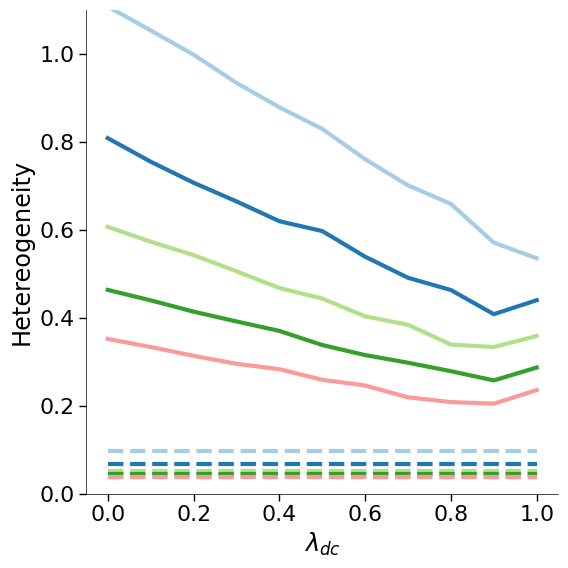

In [6]:
# load data
exp_coefficient = 2
EXPTPATH = f'../results/exp_coefficient/exp_coefficient_{exp_coefficient}'
dc_list = np.load(pjoin(EXPTPATH, 'dc_list.npy'))
esn = np.load(pjoin(EXPTPATH, 'esn.npy'))
hubesn = np.array([np.load(pjoin(EXPTPATH, f'spar_0.{i}.npy')) for i in range(1, 6)])

# plot settings
idx = 0
idx_err = 1
cs = 2 # capsize
ew = 2 # errorbar width
lw = 3 # linewidth
alp = 1 # alpha
font_scale = 1.8
plot_error = False

# plot
sns.set_color_codes("bright")
sns.set_context("paper", font_scale=font_scale)
colors = sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(6, 6))
# plot hubesn
if plot_error:
    for i in range(5):
        ax.errorbar(dc_list, hubesn[i, idx], yerr=hubesn[i, idx_err], color=colors[i], capsize=cs, elinewidth=ew, linewidth=lw, alpha=alp)
else:
    for i in range(5):
        ax.plot(dc_list, hubesn[i, idx], color=colors[i], linewidth=lw, alpha=alp)
# plot esn
for i in range(5):
    ax.plot(dc_list, esn[0][i] * np.ones_like(dc_list), '--', color=colors[i], linewidth=lw, alpha=alp)
    # make the legend
    ax.plot([], [], color=colors[i], label=r'spar = {}'.format(np.round((i+1)*0.1, 2)), linewidth=lw)

# make the legend
# ax.plot([], [], '--', color='k', label='ESN', linewidth=lw)
# ax.plot([], [], '-', color='k', label='HubESN', linewidth=lw)
# ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', prop={'size': 10})


ax.set_xlabel(r'$\lambda_{dc}$')
ax.set_ylabel(r'Hetereogeneity')
ax.set_ylim(0, 1.1)
plt.tight_layout()
# remove the top and right line in graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.savefig(pjoin(PLTPATH, f'heterogeneity_{exp_coefficient}.jpg'))

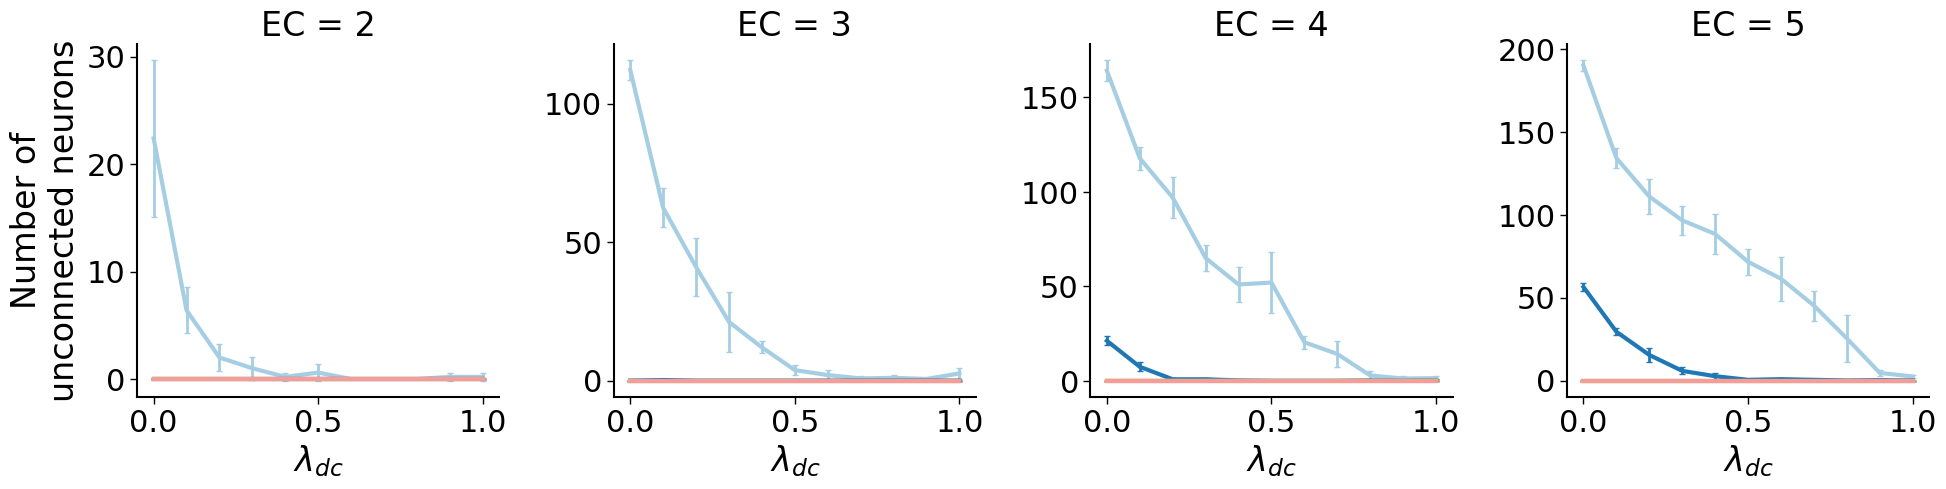

In [21]:
plot_error = True

lw = 3
sns.set_context("paper", font_scale=2.5)
idx = 2
idx_err = 3
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for ec in range(2, 6):
    EXPTPATH = f'../results/exp_coefficient/exp_coefficient_{ec}'
    dc_list = np.load(pjoin(EXPTPATH, 'dc_list.npy'))
    esn = np.load(pjoin(EXPTPATH, 'esn.npy'))
    hubesn = np.array([np.load(pjoin(EXPTPATH, f'spar_0.{i}.npy')) for i in range(1, 6)])

    if plot_error:
        for i in range(5):
            ax[ec-2].errorbar(dc_list, hubesn[i, idx], yerr=hubesn[i, idx_err], color=colors[i], capsize=cs, elinewidth=ew, linewidth=lw)
    else:
        for i in range(5):
            ax[ec-2].plot(dc_list, hubesn[i, idx], color=colors[i], linewidth=lw)
    
    ax[ec-2].set_title(f'EC = {ec}')

# # add a closeup figure to show the details
# axins = zoomed_inset_axes(ax, 2, loc='center right')
# axins.errorbar(dc_list, hubesn_01[1], yerr=hubesn_01[3], color=colors[0], capsize=cs)
# axins.errorbar(dc_list, hubesn_02[1], yerr=hubesn_02[3], color=colors[1], capsize=cs)
# axins.errorbar(dc_list, hubesn_03[1], yerr=hubesn_03[3], color=colors[2], capsize=cs)
# axins.errorbar(dc_list, hubesn_04[1], yerr=hubesn_04[3], color=colors[3], capsize=cs)
# axins.errorbar(dc_list, hubesn_05[1], yerr=hubesn_05[3], color=colors[4], capsize=cs)
# x1, x2, y1, y2 = 0.3, 0.45, -1, 5
# axins.set_xlim(x1, x2)
# axins.set_ylim(y1, y2)
# plt.xticks(visible=False)
# plt.yticks(visible=False)
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")


# make the legend
# for i in range(5):
#     # keep one digit after the decimal point
#     ax[i].plot([], [], color=colors[i], label=r'spar = {}'.format(np.round((i+1)*0.1, 2)), linewidth=lw)
# ax.legend(loc='upper right')
ax[0].set_ylabel(f'Number of\nunconnected neurons')
# ax.set_ylim(-2, 50)
plt.tight_layout()
# remove the top and right line in graph
for ax in ax:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.set_xlabel(r'$\lambda_{dc}$')
plt.savefig(pjoin(PLTPATH, f'un_{exp_coefficient}.jpg'))

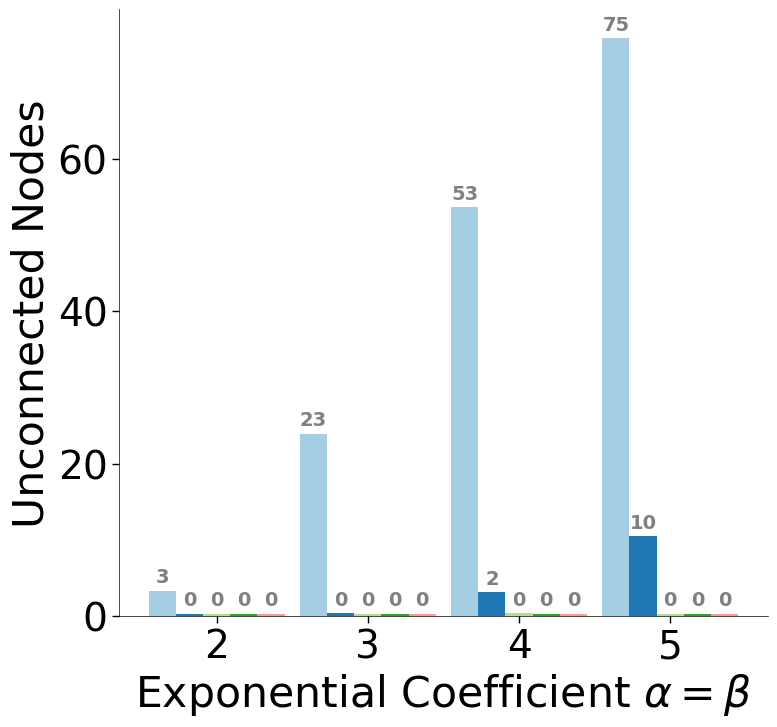

In [12]:
def autolabel(rects, zero_pad, col):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        # offset = height // 10
        ax.annotate('{}'.format(int(height-zero_pad)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=14, fontweight='bold', color='gray')

# plot settings
lw = 3
plot_error = False
error_color = '#333'
e_width = 1.5
capsize = 3
zero_pad = 0.3
bar_width = 0.18
font_size = 22
font_scale = 3.2
sns.set_color_codes("bright")
sns.set_context("paper", font_scale=font_scale)
colors = sns.color_palette("Paired")

# plot the unconnected neurons
hubesn_data = []
for i in range(2, 6):
    EXPTPATH = f'../results/exp_coefficient/exp_coefficient_{i}'
    dc_list = np.load(pjoin(EXPTPATH, 'dc_list.npy'))
    hubesn = np.array([np.load(pjoin(EXPTPATH, f'spar_0.{i}.npy')) for i in range(1, 6)])
    hubesn_data.append(hubesn)
hubesn_data = np.array(hubesn_data)
hubesn_un = hubesn_data[:, :, [2, 3], :] # get only the unconnected neurons
hubesn_un = hubesn_un.mean(axis=3) # sum over the different dc values

fig, ax = plt.subplots(figsize=(8.5, 8))
# fig, ax = plt.subplots(figsize=(12, 8))
# plot in bars
for i in range(5):
    if plot_error is True:
        bar_plots = ax.bar(np.arange(4) + i*bar_width, 
                           hubesn_un[:, i, 0]+zero_pad, 
                           yerr=hubesn_un[:, i, 1], 
                           width=bar_width, 
                           color=colors[i], 
                           ecolor=error_color, 
                           error_kw={'elinewidth': e_width, 'capsize': capsize})
    else:
        bar_plots = ax.bar(np.arange(4) + i*bar_width, 
                           hubesn_un[:, i, 0]+zero_pad, 
                           width=bar_width, 
                           color=colors[i])
    # make the legend
    ax.plot([], [], color=colors[i], label=r'spar = {}'.format(np.round((i+1)*0.1, 2)), linewidth=lw)
    autolabel(bar_plots, zero_pad, colors[i])
ax.set_xticks(np.arange(4) + 2*bar_width)
ax.set_xticklabels([f'{i+2}' for i in range(4)])
ax.set_xlabel(r"Exponential Coefficient $\alpha = \beta$")
ax.set_ylabel('Unconnected Nodes')

# ax.legend(bbox_to_anchor=(1, 0.5), loc='lower left', borderaxespad=0.)
plt.tight_layout()
# remove the top and right line in graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.tight_layout()
plt.savefig(pjoin(PLTPATH, f'un_bar.jpg'))

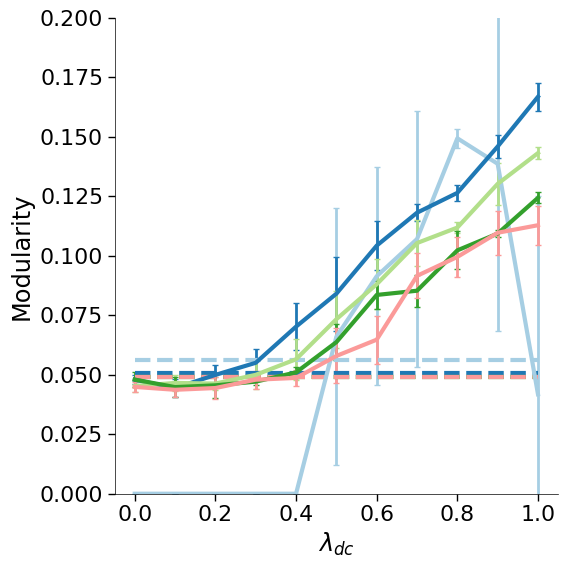

In [251]:
# load data
exp_coefficient = 2
EXPTPATH = f'../results/exp_coefficient/exp_coefficient_{exp_coefficient}'
dc_list = np.load(pjoin(EXPTPATH, 'dc_list.npy'))
esn = np.load(pjoin(EXPTPATH, 'esn.npy'))
hubesn = np.array([np.load(pjoin(EXPTPATH, f'spar_0.{i}.npy')) for i in range(1, 6)])

# plot settings
idx = 4 # index of the data
idx_err = 5 # index of the error
cs = 2 # capsize
ew = 2 # errorbar width
lw = 3 # linewidth
al = 1 # alpha
plot_error = True
font_size = 14
font_scale = 1.8

# plot
sns.set_color_codes("bright")
sns.set_context("paper", font_scale=font_scale)
colors = sns.color_palette("Paired")
fig, ax = plt.subplots(figsize=(6, 6))
# plot hubesn
if plot_error:
    for i in range(5):
        ax.errorbar(dc_list, hubesn[i, idx], yerr=hubesn[i, idx_err], color=colors[i], capsize=cs, elinewidth=ew, linewidth=lw, alpha=al)
else:
    for i in range(5):
        ax.plot(dc_list, hubesn[i, idx], color=colors[i], linewidth=lw, alpha=al)
# plot esn
for i in range(5):
    ax.plot(dc_list, esn[2][i] * np.ones_like(dc_list), '--', color=colors[i], linewidth=lw, alpha=al)
    # make the legend
    ax.plot([], [], color=colors[i], label=r'spar = {}'.format(np.round((i+1)*0.1, 2)), linewidth=lw)

# make the legend
# ax.plot([], [], '--', color='k', label='ESN', linewidth=lw)
# ax.plot([], [], '-', color='k', label='HubESN', linewidth=lw)
# ax.legend(loc='upper left', prop={'size': font_size})


ax.set_xlabel(r'$\lambda_{dc}$')
ax.set_ylabel(r'Modularity')
ax.set_ylim(0, 0.2)
plt.tight_layout()
# remove the top and right line in graph
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
plt.savefig(pjoin(PLTPATH, f'modularity_{exp_coefficient}.jpg'))

NameError: name 'PLTPATH' is not defined

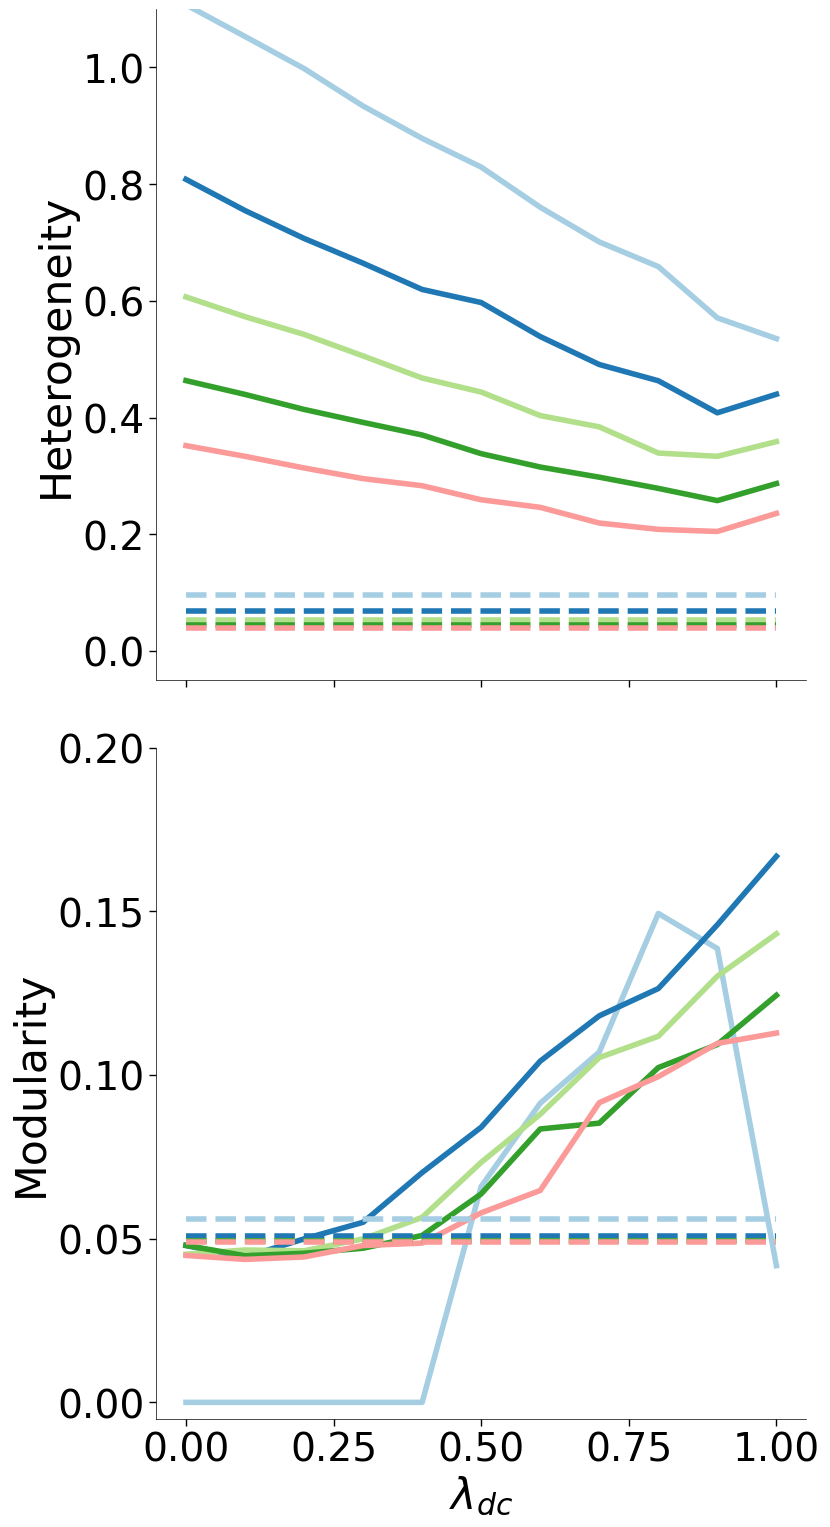

In [4]:
# load data
exp_coefficient = 2
EXPTPATH = f'../results/exp_coefficient/exp_coefficient_{exp_coefficient}'
dc_list = np.load(pjoin(EXPTPATH, 'dc_list.npy'))
esn = np.load(pjoin(EXPTPATH, 'esn.npy'))
hubesn = np.array([np.load(pjoin(EXPTPATH, f'spar_0.{i}.npy')) for i in range(1, 6)])

# plot settings
cs = 2 # capsize
ew = 3 # errorbar width
lw = 4 # linewidth
al = 1 # alpha
plot_error = False
font_size = 25
font_scale = 3.2

# plot
sns.set_color_codes("bright")
sns.set_context("paper", font_scale=font_scale)
colors = sns.color_palette("Paired")
fig, axs = plt.subplots(2, 1, figsize=(9, 16), sharex=True)
# plot hubesn
if plot_error:
    for i in range(5):
        axs[0].errorbar(dc_list, hubesn[i, 0], yerr=hubesn[i, 1], color=colors[i], capsize=cs, elinewidth=ew, linewidth=lw, alpha=al)
        axs[1].errorbar(dc_list, hubesn[i, 4], yerr=hubesn[i, 5], color=colors[i], capsize=cs, elinewidth=ew, linewidth=lw, alpha=al)
else:
    for i in range(5):
        axs[0].plot(dc_list, hubesn[i, 0], color=colors[i], linewidth=lw, alpha=al)
        axs[1].plot(dc_list, hubesn[i, 4], color=colors[i], linewidth=lw, alpha=al)
# plot esn
for i in range(5):
    axs[0].plot(dc_list, esn[0][i] * np.ones_like(dc_list), '--', color=colors[i], linewidth=lw, alpha=al)
    axs[1].plot(dc_list, esn[2][i] * np.ones_like(dc_list), '--', color=colors[i], linewidth=lw, alpha=al)
    # make the legend
    # axs[1].plot([], [], color=colors[i], label=r'spar = {}'.format(np.round((i+1)*0.1, 2)), linewidth=lw)

# make the legend
# ax.plot([], [], '--', color='k', label='ESN', linewidth=lw)
# ax.plot([], [], '-', color='k', label='HubESN', linewidth=lw)
# axs[1].legend(loc='upper left', prop={'size': font_size})


axs[0].set_ylabel(r'Heterogeneity')
axs[0].set_ylim(-0.05, 1.1)
# axs[0].set_yticks(np.linspace(0.05, 1.1, 5))
axs[1].set_xlabel(r'$\lambda_{dc}$')
axs[1].set_ylabel(r'Modularity')
axs[1].set_ylim(-0.005, 0.2)
axs[1].set_yticks(np.linspace(0, 0.2, 5))
# axs[1].legend(loc='upper left', prop={'size': 20})
plt.tight_layout()
# remove the top and right line in graph
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_linewidth(0.5)
axs[0].spines['bottom'].set_linewidth(0.5)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_linewidth(0.5)
axs[1].spines['bottom'].set_linewidth(0.5)
plt.savefig(pjoin(PLTPATH, f'mod_het_{exp_coefficient}.jpg'))

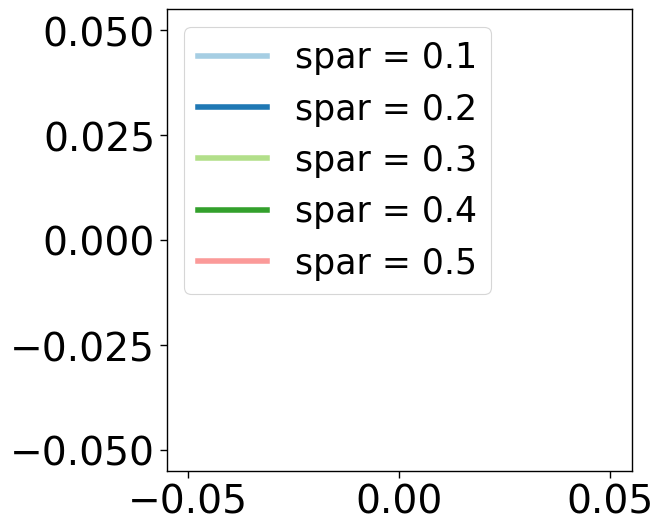

In [6]:
# plot legend
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot([], [], '-', color=colors[0], label=r'spar = {}'.format(np.round(0.1, 2)), linewidth=lw)
ax.plot([], [], '-', color=colors[1], label=r'spar = {}'.format(np.round(0.2, 2)), linewidth=lw)
ax.plot([], [], '-', color=colors[2], label=r'spar = {}'.format(np.round(0.3, 2)), linewidth=lw)
ax.plot([], [], '-', color=colors[3], label=r'spar = {}'.format(np.round(0.4, 2)), linewidth=lw)
ax.plot([], [], '-', color=colors[4], label=r'spar = {}'.format(np.round(0.5, 2)), linewidth=lw)
ax.legend(loc='upper left', prop={'size': font_size})